In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:

from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import itertools
from statsmodels.base.transform import BoxCox
import pandas_datareader as web
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =  20, 15
plt.style.use('seaborn')

In [4]:
data = pd.read_csv("/content/drive/MyDrive/DIGICHROME/TSLA.csv")

data.dropna(inplace=True)
data.reset_index(drop =True,inplace=True)

In [5]:
#how many sample do we have
len(data)

2416

In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
data=data[['Date','Close']]
data.head()

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


**Change Column Names for Prophet**

In [8]:
# Assuming 'data' is your DataFrame containing the time series data
data.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
data.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


<Axes: xlabel='ds'>

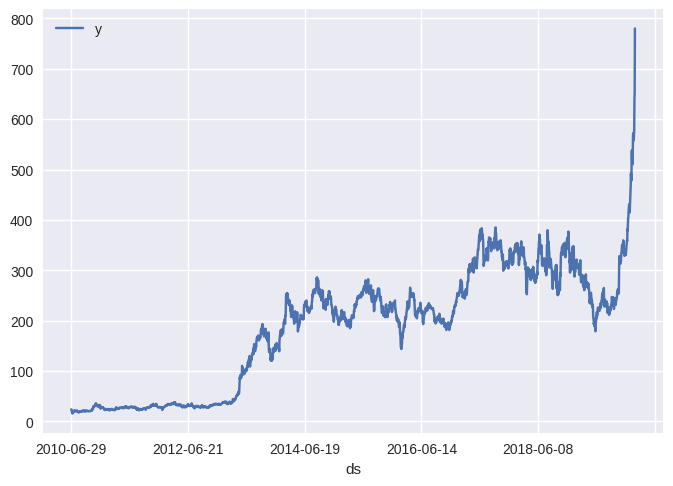

In [9]:
data.plot(x='ds',y='y')

In [10]:
data

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [12]:
# Python
m = Prophet()
m.fit(data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy625x0vd/zecp9lm2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy625x0vd/bp1cv3jm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5765', 'data', 'file=/tmp/tmpy625x0vd/zecp9lm2.json', 'init=/tmp/tmpy625x0vd/bp1cv3jm.json', 'output', 'file=/tmp/tmpy625x0vd/prophet_model4bksm3u0/prophet_model-20240220171458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:14:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2776,2021-01-29
2777,2021-01-30
2778,2021-01-31
2779,2021-02-01
2780,2021-02-02


In [14]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
2776,2021-01-29,310.993911,248.488959,376.078686
2777,2021-01-30,311.256242,250.314247,379.346318
2778,2021-01-31,309.568617,248.159088,376.064261
2779,2021-02-01,306.958622,248.203765,370.103311
2780,2021-02-02,304.420751,244.960056,365.569476


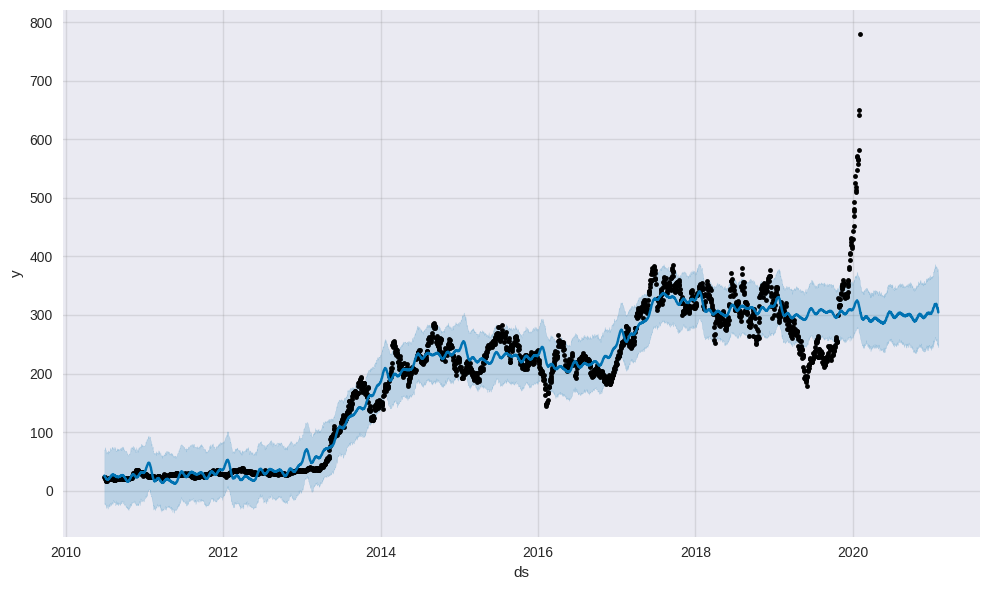

In [15]:
# Python
fig1 = m.plot(forecast)

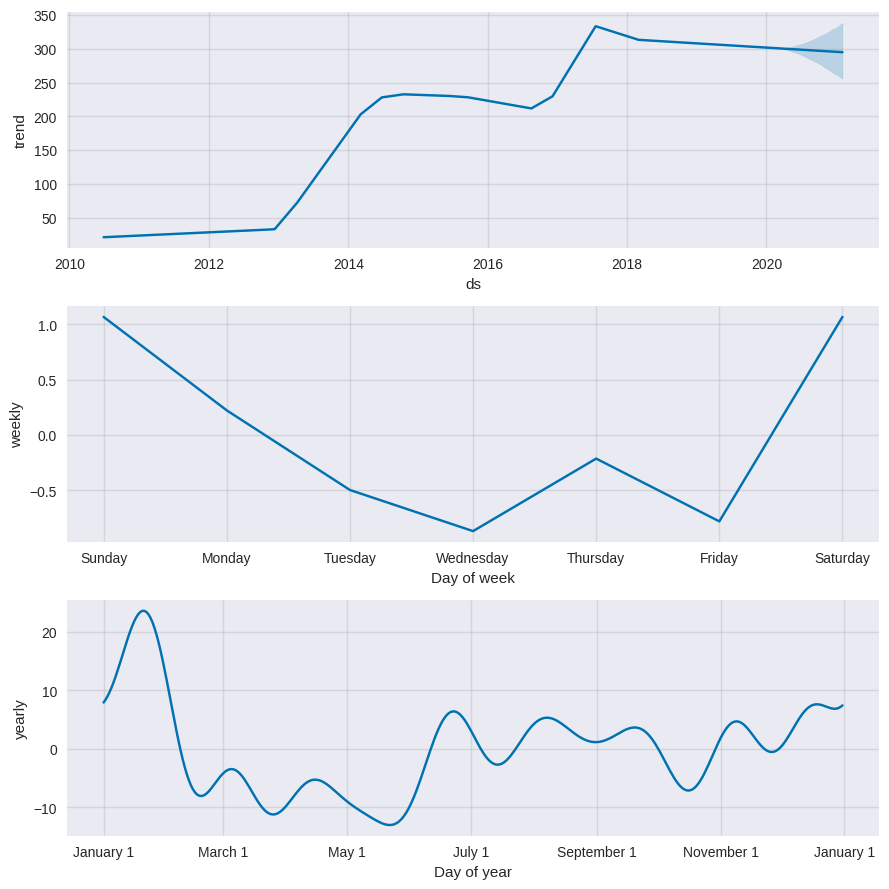

In [16]:
# Python
fig2 = m.plot_components(forecast)

In [17]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [18]:
# Python
plot_components_plotly(m, forecast)

